# Kaggle 
## **<font color=red>Fully self-practice method </font>**
https://www.kaggle.com/datasets/davidgdong/marvel-cinematic-universe-box-office-dataset
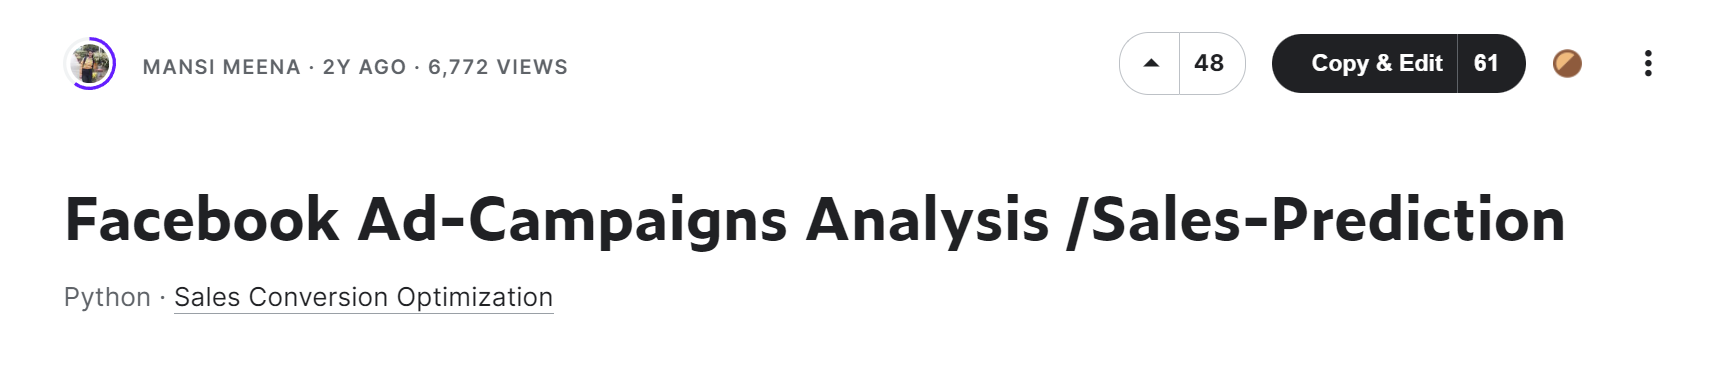

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joypy
%matplotlib inline
%config InlineBackend. figure_format = "retina"

Data:

The data used in this project is from an anonymous organisation’s social media ad campaign.

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.


6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [331]:
data=pd.read_csv("data.csv")
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [332]:
len(data)

1143

In [333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [334]:
# 清洗Gender中的異常資料
data.loc[data["gender"]=="J",["gender"]]="F"

In [335]:
sns.set(style = "darkgrid")

,count
,ad_id
xyz_campaign_id,
916,54
936,464
1178,625


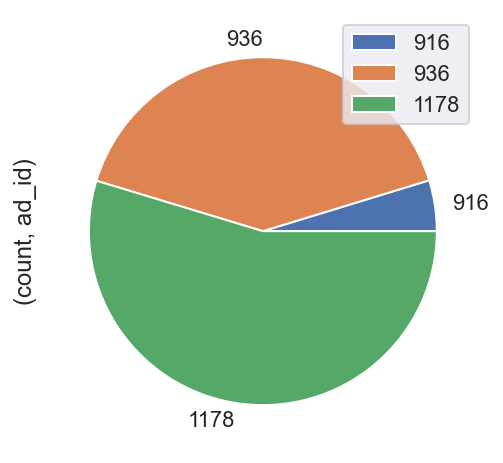

In [385]:
df=data.pivot_table(index="xyz_campaign_id",values="ad_id",aggfunc=["count"])
df.plot(kind="pie",subplots="True")
df

gender,F,M
xyz_campaign_id,,
916,19,35
936,257,207
1178,276,349


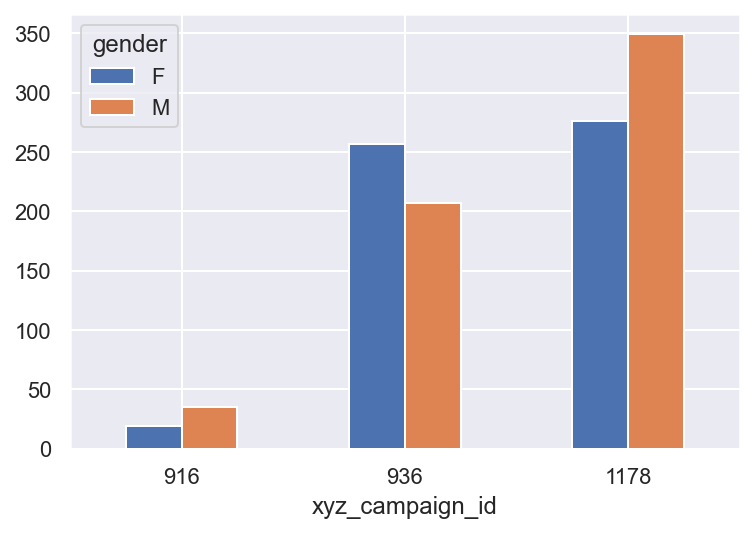

In [336]:
df=data.pivot_table(index="xyz_campaign_id",columns="gender",values="ad_id",aggfunc="count")

df.plot(kind="bar")
plt.xticks(rotation=0)
df

age,30-34,35-39,40-44,45-49
xyz_campaign_id,,,,
916,29,12,6,7
936,196,89,75,104
1178,201,147,129,148


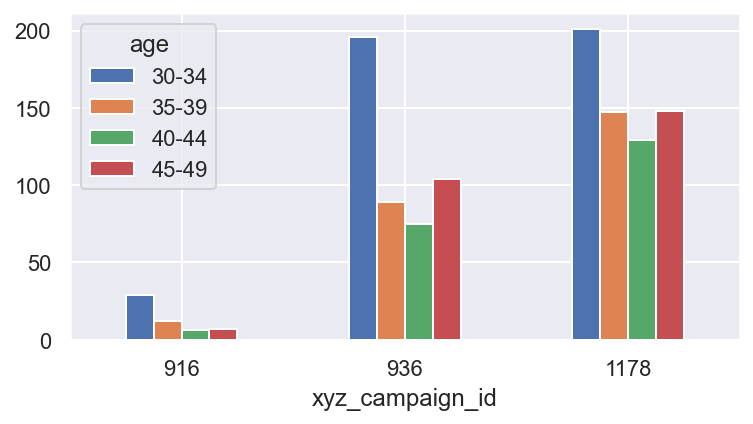

In [337]:
df=data.pivot_table(index="xyz_campaign_id",columns="age",values="ad_id",aggfunc="count")
df.plot(kind="bar",figsize=(6,3))
plt.xticks(rotation=0)
df

,Approved_Conversion,Total_Conversion
xyz_campaign_id,,
916,24,58
936,183,537
1178,872,2669


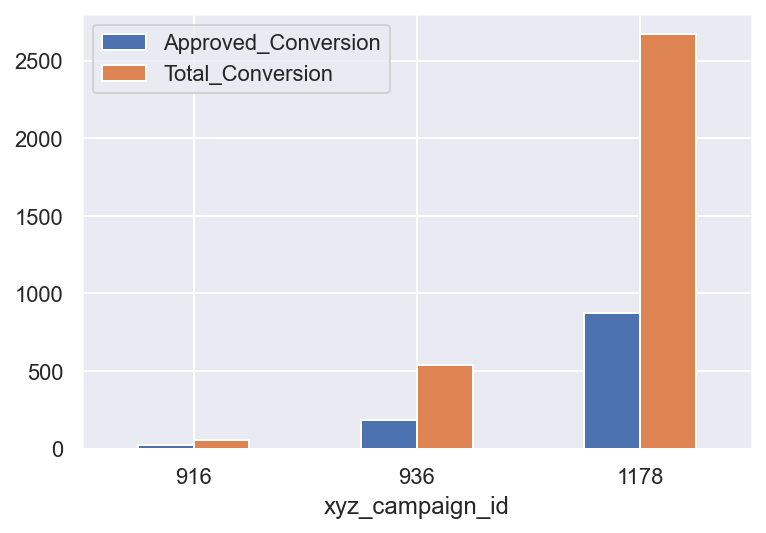

In [387]:
df=data.groupby(["xyz_campaign_id"])[["Approved_Conversion","Total_Conversion"]].sum()
df.plot(kind="bar")
plt.xticks(rotation=0)
df

In [339]:
data["Spent"]=data["Spent"].astype('int64')

In [340]:
bins=[0,1,100,200,300,400,500,600,700]
df=pd.cut(data["Spent"],bins,include_lowest=True)
df=pd.DataFrame(df)
data.insert(len(df.columns),"abc",df.values)

data.head(5)

,ad_id,abc,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,"(-0.001, 1.0]",916,103916,30-34,M,15,7350,1,1,2,1
1,708749,"(-0.001, 1.0]",916,103917,30-34,M,16,17861,2,1,2,0
2,708771,"(-0.001, 1.0]",916,103920,30-34,M,20,693,0,0,1,0
3,708815,"(-0.001, 1.0]",916,103928,30-34,M,28,4259,1,1,1,0
4,708818,"(-0.001, 1.0]",916,103928,30-34,M,28,4133,1,1,1,1


ad_id              
xyz_campaign_id  916    936    1178
Free             36.0  273.0   24.0
1-100            18.0  189.0  413.0
101-200           NaN    2.0  105.0
201-300           NaN    NaN   50.0
301-400           NaN    NaN   23.0
401-500           NaN    NaN    6.0
501-600           NaN    NaN    1.0
600 above         NaN    NaN    3.0

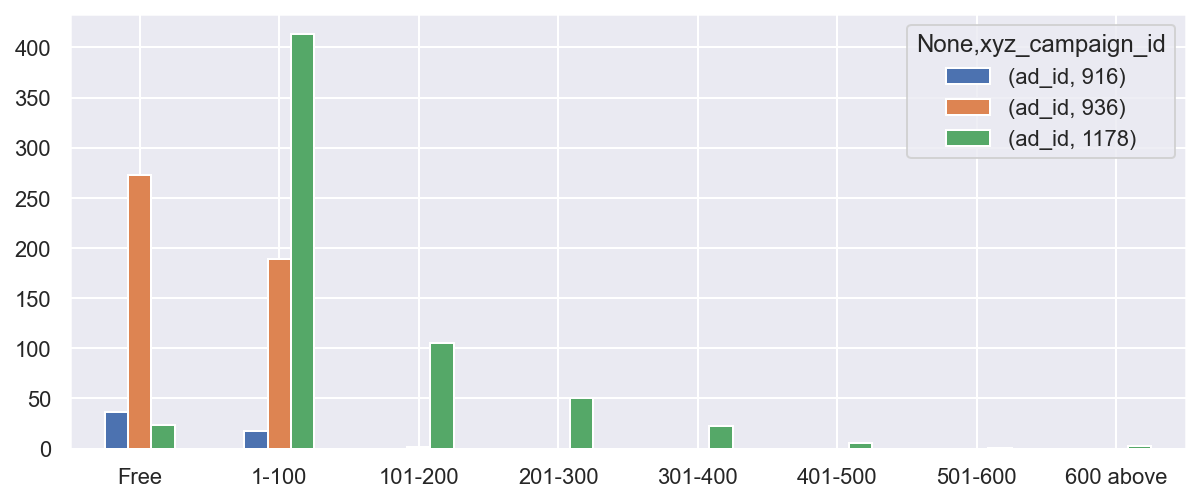

In [341]:
df=data.pivot_table(index=["abc"],columns=["xyz_campaign_id"],values=["ad_id"],aggfunc="count")
df.index=("Free","1-100","101-200","201-300","301-400","401-500","501-600","600 above")
df.plot(kind="bar",figsize=(10,4))
plt.xticks(rotation=0)
df

xyz_campaign_id,916,936,1178
Free,36,273,24
1-100,18,189,413
101-200,0,2,105
201-300,0,0,50
301-400,0,0,23
401-500,0,0,6
501-600,0,0,1
600 above,0,0,3


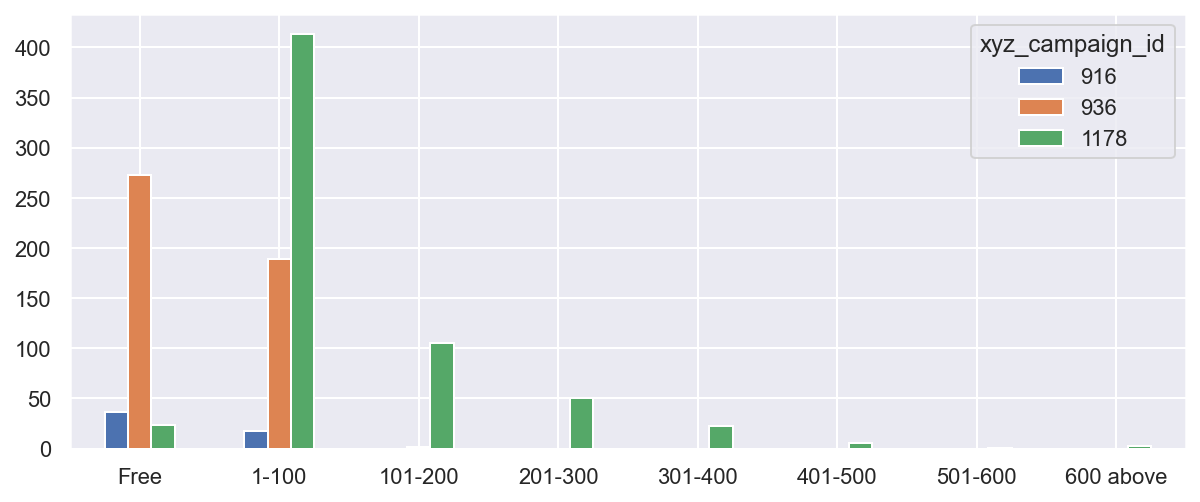

In [342]:
# Better Solution
df=pd.crosstab(data["abc"],data["xyz_campaign_id"])
df.index=("Free","1-100","101-200","201-300","301-400","401-500","501-600","600 above")
df.plot(kind="bar",figsize=(10,4))
plt.xticks(rotation=0)
df

In [343]:
df=pd.cut(data["interest"],bins=5,include_lowest=True)
df=pd.DataFrame(df)
data.insert(len(df.columns),"123",df.values)

data.head(5)

,ad_id,123,abc,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,"(1.887, 24.4]","(-0.001, 1.0]",916,103916,30-34,M,15,7350,1,1,2,1
1,708749,"(1.887, 24.4]","(-0.001, 1.0]",916,103917,30-34,M,16,17861,2,1,2,0
2,708771,"(1.887, 24.4]","(-0.001, 1.0]",916,103920,30-34,M,20,693,0,0,1,0
3,708815,"(24.4, 46.8]","(-0.001, 1.0]",916,103928,30-34,M,28,4259,1,1,1,0
4,708818,"(24.4, 46.8]","(-0.001, 1.0]",916,103928,30-34,M,28,4133,1,1,1,1


xyz_campaign_id,916,936,1178
123,,,
"(1.887, 24.4]",36,260,269
"(24.4, 46.8]",15,155,189
"(46.8, 69.2]",3,49,72
"(91.6, 114.0]",0,0,95


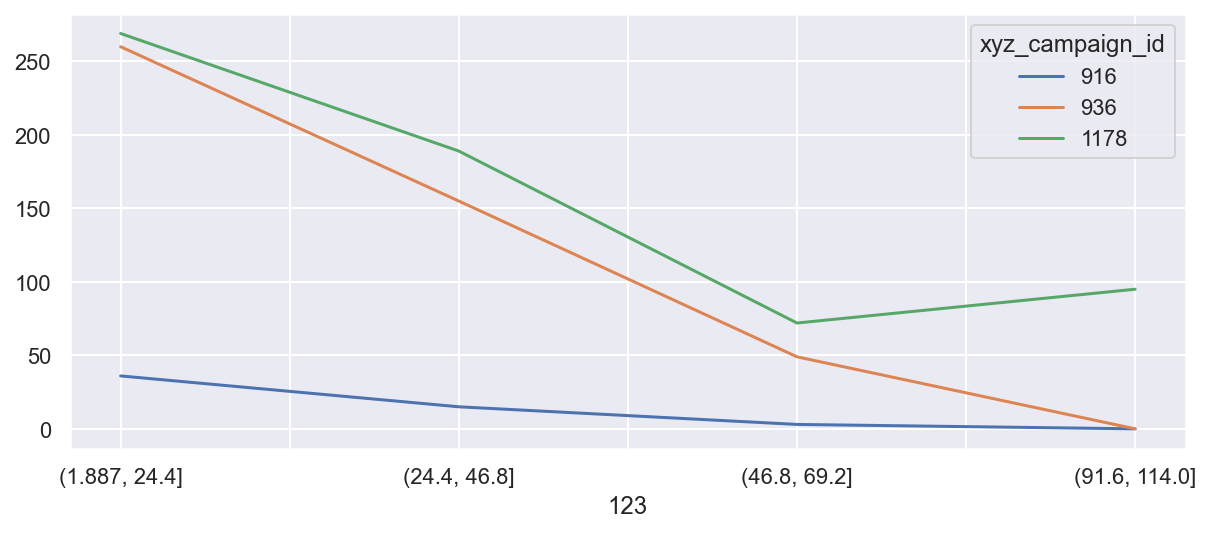

In [344]:
df=pd.crosstab(data["123"],data["xyz_campaign_id"])
df.plot(kind="line",figsize=(10,4))
df

In [345]:
bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,150000,200000,300000,max(data["Impressions"])]
df=pd.cut(data["Impressions"],bins,include_lowest=True)
df=pd.DataFrame(df)
data.insert(len(df.columns),"impressions",df.values)
data.head(5)

,ad_id,impressions,123,abc,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,"(-0.001, 10000.0]","(1.887, 24.4]","(-0.001, 1.0]",916,103916,30-34,M,15,7350,1,1,2,1
1,708749,"(10000.0, 20000.0]","(1.887, 24.4]","(-0.001, 1.0]",916,103917,30-34,M,16,17861,2,1,2,0
2,708771,"(-0.001, 10000.0]","(1.887, 24.4]","(-0.001, 1.0]",916,103920,30-34,M,20,693,0,0,1,0
3,708815,"(-0.001, 10000.0]","(24.4, 46.8]","(-0.001, 1.0]",916,103928,30-34,M,28,4259,1,1,1,0
4,708818,"(-0.001, 10000.0]","(24.4, 46.8]","(-0.001, 1.0]",916,103928,30-34,M,28,4133,1,1,1,1


xyz_campaign_id,916,936,1178
impressions,,,
"(-0.001, 10000.0]",37,307,10
"(10000.0, 20000.0]",11,69,12
"(20000.0, 30000.0]",3,31,28
"(30000.0, 40000.0]",1,10,19
"(40000.0, 50000.0]",1,9,19
"(50000.0, 60000.0]",1,5,21
"(60000.0, 70000.0]",0,3,18
"(70000.0, 80000.0]",0,5,17
"(80000.0, 90000.0]",0,5,17


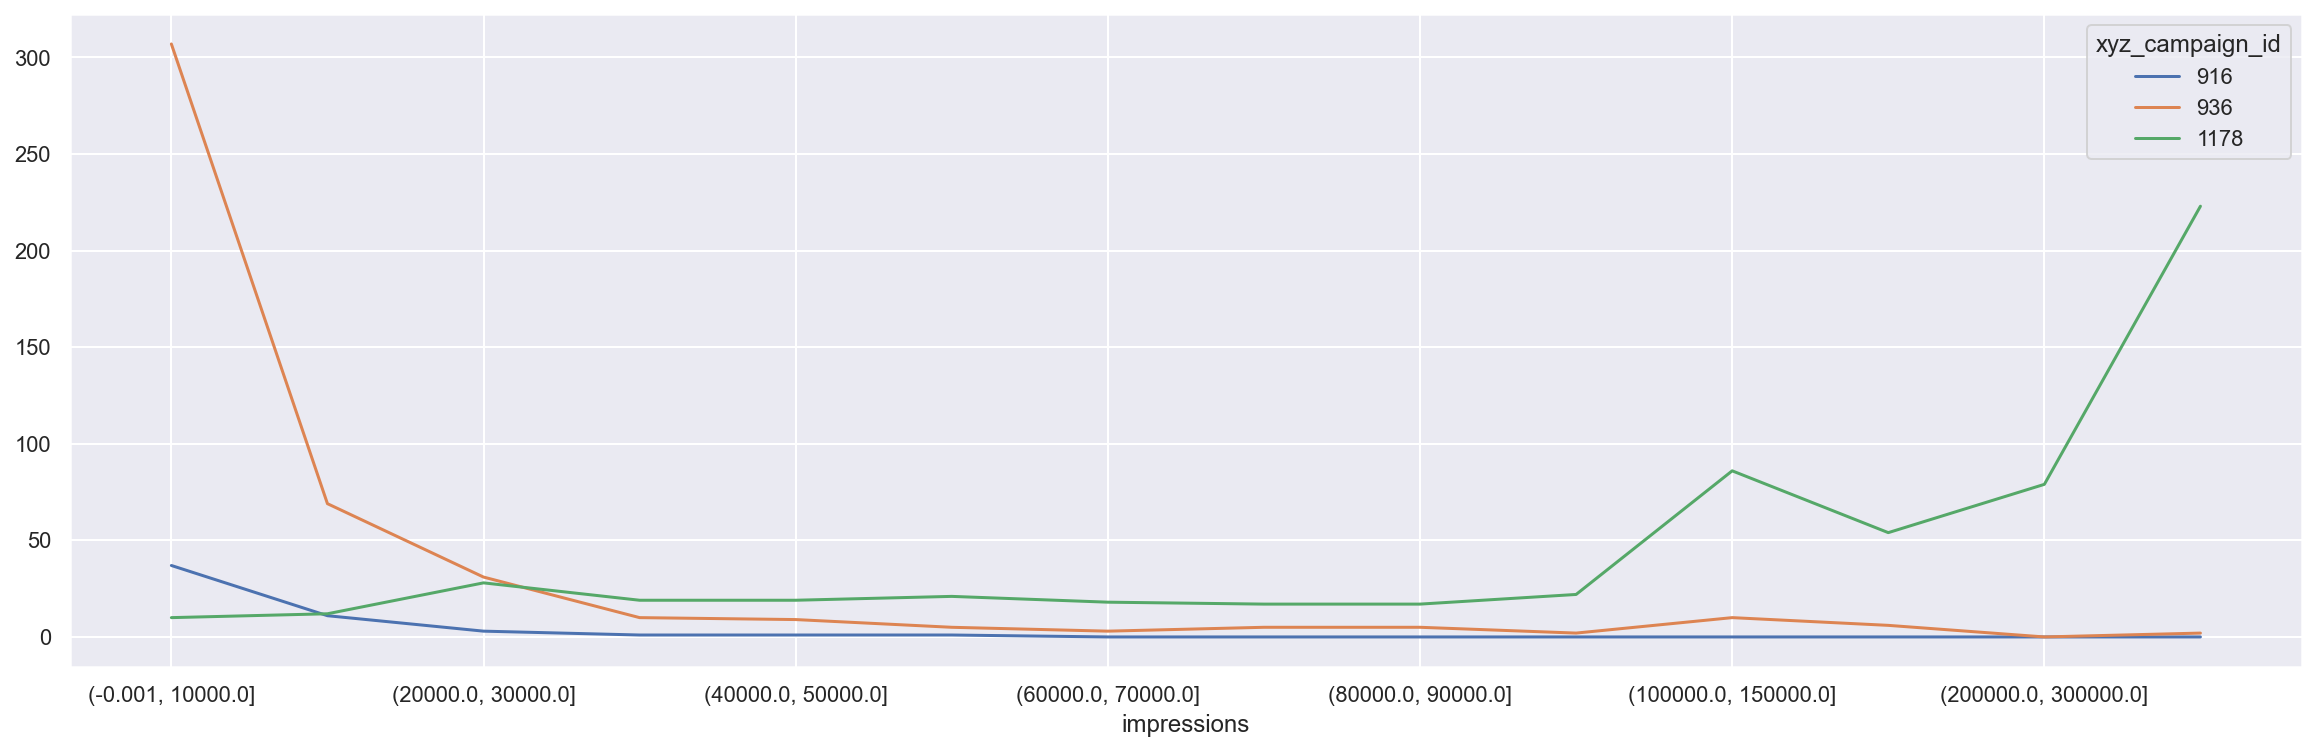

In [346]:
df=pd.crosstab(data["impressions"],data["xyz_campaign_id"])    
df.plot(kind="line",figsize=(20,6))
df

ad_id          
xyz_campaign_id  916  936  1178
gender age                     
F      30-34       11   97   89
       35-39        3   50   57
       40-44        1   46   60
       45-49        4   64   70
M      30-34       18   99  112
       35-39        9   39   90
       40-44        5   29   69
       45-49        3   40   78

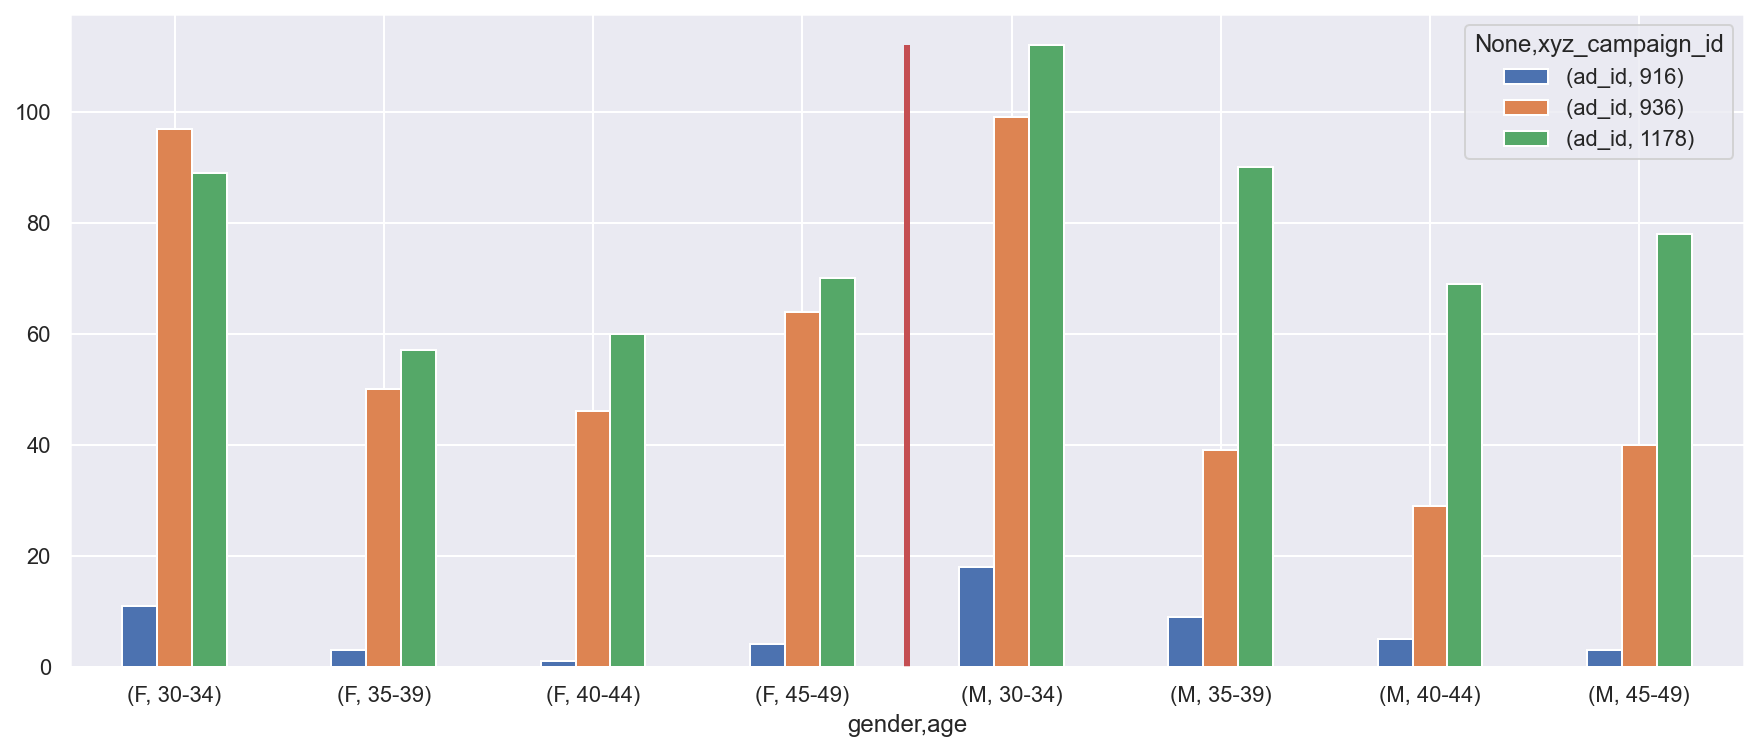

In [374]:
df=data.pivot_table(index=["gender","age"],columns=["xyz_campaign_id"],values=["ad_id"],aggfunc="count")

df.plot(kind="bar",figsize=(15,6))
plt.xticks(rotation=0)
plt.vlines(x=(3.5), ymin=0, ymax=df.values.max(),lw=3,colors ="r")

df